In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import pylab as plt
import argparse
import os
import matplotlib
from matplotlib.gridspec import GridSpec
from pathlib import Path
from tqdm import tqdm

In [2]:
def RAD(deg):
    return deg * np.pi / 180.0

def GET_R2(num_seg, case):
    data = pd.read_csv('data/{}.csv'.format(case), index_col=0)
    df = data.loc[data.Segm == num_seg]
    result = sm.ols(formula="Voltage ~ WT", data=df).fit()
    return result.rsquared

def GET_SLOPE(num_seg, case):
    data = pd.read_csv('data/{}.csv'.format(case), index_col=0)
    df = data.loc[data.Segm == num_seg]
    result = sm.ols(formula="Voltage ~ WT", data=df).fit()
    return result.params.WT

In [3]:
cases = ['uv_lv', 'uv_2p', 'uv_s20', 'uv_s100', 
         'bv90_lv', 'bv90_2p', 'bv90_s20', 'bv90_s100', 
         'bv0_lv', 'bv0_2p', 'bv0_s20', 'bv0_s100', 
         'bv45_lv', 'bv45_2p', 'bv45_s20', 'bv45_s100']
segm = list(range(1,18))

In [4]:
df = pd.DataFrame(columns=['R2', 'slope', 'Segment', 'case'])

In [5]:
from itertools import product

i = 0
for c, s in tqdm(product(cases, segm)):
    df.loc[i] = [GET_R2(s,c), GET_SLOPE(s,c), s, c]
    i += 1

272it [00:12, 21.94it/s]


In [6]:
df.head()

,R2,slope,Segment,case
0,0.236527,0.127681,1,uv_lv
1,0.315447,0.141509,2,uv_lv
2,0.304058,0.131433,3,uv_lv
3,0.174444,0.112195,4,uv_lv
4,0.289964,0.145411,5,uv_lv


In [7]:
df_r2 = pd.pivot_table(data=df, index='Segment', values='R2', columns='case')
df_slope = pd.pivot_table(data=df, index='Segment', values='slope', columns='case')

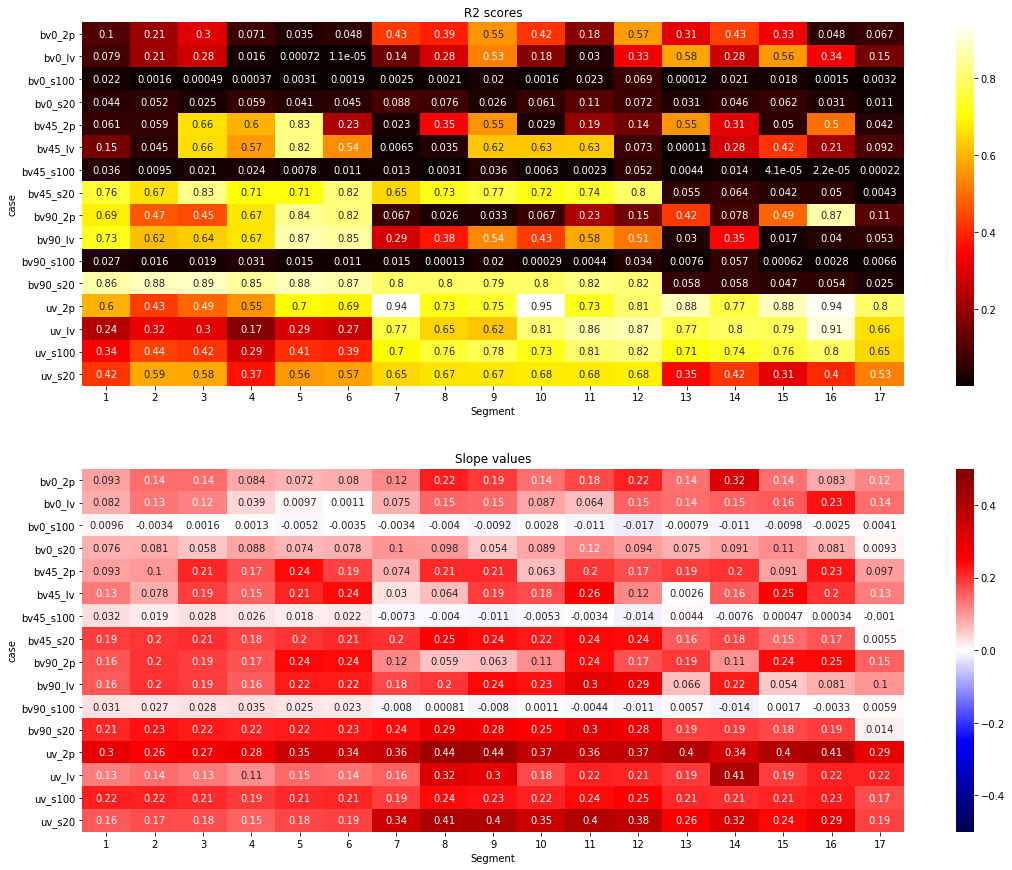

In [8]:
fig, ax = plt.subplots(nrows=2, figsize=(15,12))

ax[0].set_title('R2 scores')
ax[1].set_title('Slope values')

fig.tight_layout(h_pad=5)

sns.heatmap(df_r2.T, ax=ax[0], annot=True, cmap=plt.cm.hot)
sns.heatmap(df_slope.T, ax=ax[1], annot=True, vmin=-0.5, vmax=0.5, cmap=plt.cm.seismic)

plt.show()